In [1]:
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np

plt.style.use(hep.cms.style.ROOT)

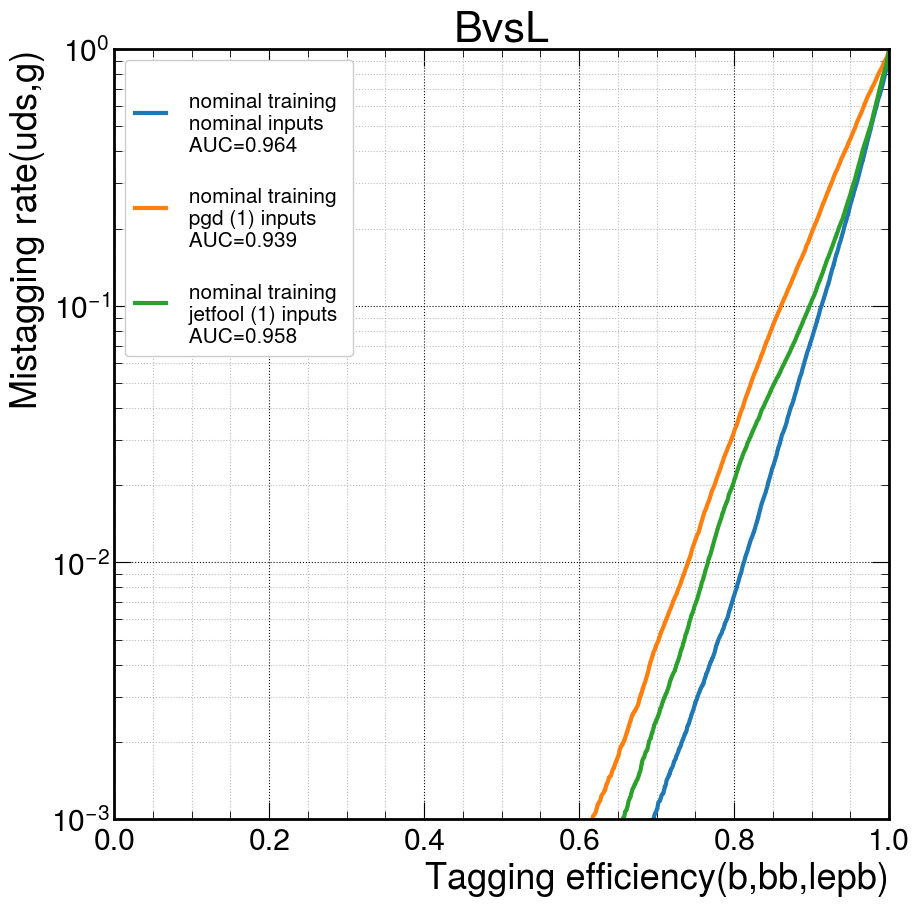

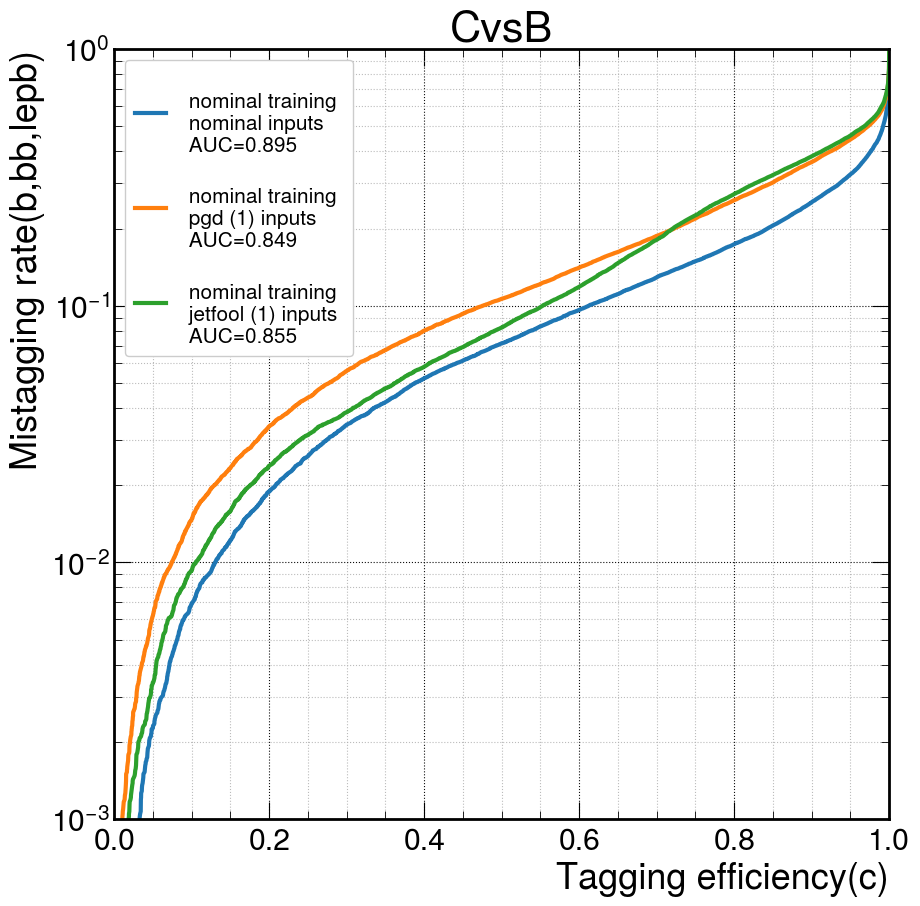

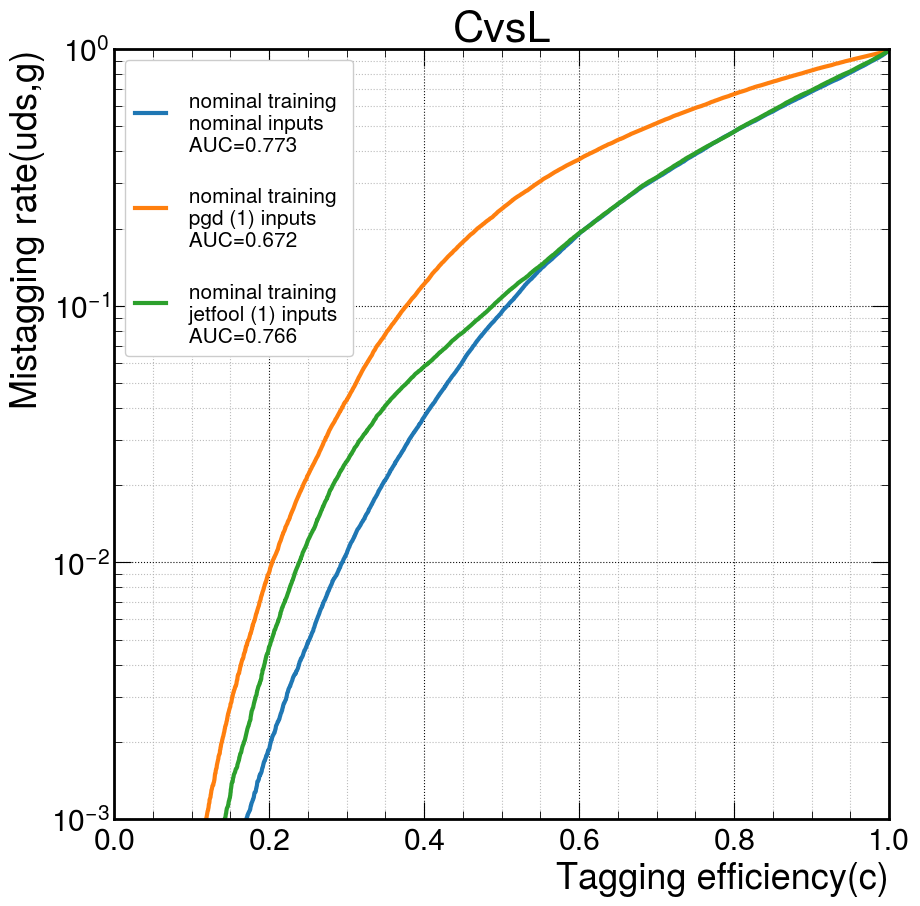

In [2]:
prediction_paths = [
    "nominal/predict/",
    "nominal/predict_pgd_1/",
    "nominal/predict_jetfool/",
]
training_labels = [
    "nominal",
    "nominal",
    "nominal",
]
prediction_labels = [
    "nominal",
    "pgd (1)",
    "jetfool (1)",
]


def plot_roc(prediction, labels_train, labels_pred):
    base_input_dir = "/net/scratch_cms3a/ajung/deepjet/results/"  # "/hpcwork/pj214607/work/promotion/deepjet/results/"
    base_output_dir = "/home/home1/institut_3a/ajung/work/deepjet/results/roc_dump/"  # "/home/pj214607/work/promotion/deepjet/results/roc_dump/"

    tag_names = ["(b,bb,lepb)", "(c)", "(c)"]
    mistag_names = ["(uds,g)", "(b,bb,lepb)", "(uds,g)"]
    titles = ["BvsL", "CvsB", "CvsL"]

    bvsl = [base_input_dir + f"{pred}BvL.npy" for pred in prediction]
    cvsb = [base_input_dir + f"{pred}CvB.npy" for pred in prediction]
    cvsl = [base_input_dir + f"{pred}CvL.npy" for pred in prediction]

    for i in range(3):
        plt.figure()
        plt.yscale("log")
        plt.xlim(0, 1)
        plt.ylim(1e-3, 1)
        plt.xlabel("Tagging efficiency" + tag_names[i])
        plt.ylabel("Mistagging rate" + mistag_names[i])
        plt.grid(which="minor", alpha=0.85)
        plt.grid(which="major", alpha=0.95, color="black")

        if i == 0:
            discriminator = bvsl
            title = titles[0]
        if i == 1:
            discriminator = cvsb
            title = titles[1]
        if i == 2:
            discriminator = cvsl
            title = titles[2]
        for j, d in enumerate(discriminator):
            array = np.load(d)
            plt.plot(
                array[0],
                array[1],
                linewidth=3.0,
                label=f"\n {labels_train[j]} training \n {labels_pred[j]} inputs \n AUC={np.round(array[2,0], 3)}",
            )
            plt.legend(
                loc="best", fontsize=15, facecolor="white", frameon=True, framealpha=1
            )
            plt.title(title)
        plt.savefig(f"{base_output_dir}roc_{title}.pdf")
        plt.show()
        plt.close()


plot_roc(prediction_paths, training_labels, prediction_labels)